In [1]:
# import CartPole.py from local directory
import CartPole, sf3utility
import matplotlib.collections
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate, scipy.stats.qmc, scipy.optimize
import random, copy

plt.rcParams["font.family"] = "Georgia"
#plt.rcParams['figure.figsize'] = [9.0, 7.0]
#plt.rcParams['figure.dpi'] = 400

# store results for later
cache = {}

In [2]:
%matplotlib notebook

In [3]:
def noisy_rollout_loss( initial_state, p ):
    
    state = initial_state
    sim_seconds = 8
    sim_steps = int( sim_seconds / 0.2 )
    loss = 0
    noise_level = 0.01
    
    for i in range( sim_steps ):
        
        if np.any( np.abs(state) > np.array([10,40,50,1e+3,1e+3]) ):
            return sim_steps
        
        
        state = state + np.random.randn( 5 ) * means * noise_level
        
        state[4] = p @ state
        loss += CartPole.loss( state[:4] )
        state = CartPole.perform_action_RK4( state )
    
    return loss

In [8]:
%%time

initial_state = np.array( [ 0.2, 0, 0.2, 0, 0 ] )
#initial_state = np.array( [1,0,0.5,0,0] )

pad0 = lambda p : np.pad( p, (0,1) )
rollout_loss_from_initial = lambda p : noisy_rollout_loss( initial_state, pad0(p) )

means = np.array([ 2.00903004, 1.9578942, 1.99085053, 4.74956371, 0. ])


min_loss = 999999
best_p = None

for i in range(1000):

    p0     = np.random.rand( (4) ) * 10 - 5
    result = scipy.optimize.minimize( rollout_loss_from_initial, p0, method="Nelder-Mead" )
    
    end_loss = rollout_loss_from_initial( result["x"] )
    
    if end_loss < min_loss:
        best_p = result["x"]
        min_loss = end_loss
        
    print(best_p, min_loss)

p = best_p

[ 4.32492158 -3.57762984  4.31208252 -3.36051713] 40
[ 4.32492158 -3.57762984  4.31208252 -3.36051713] 40
[ 4.32492158 -3.57762984  4.31208252 -3.36051713] 40
[ 4.32492158 -3.57762984  4.31208252 -3.36051713] 40
[ 4.32492158 -3.57762984  4.31208252 -3.36051713] 40
[-4.6334434  -4.62894428 -4.93142831 -3.03810833] 39.161157974981116
[-4.6334434  -4.62894428 -4.93142831 -3.03810833] 39.161157974981116
[-4.6334434  -4.62894428 -4.93142831 -3.03810833] 39.161157974981116
[-4.6334434  -4.62894428 -4.93142831 -3.03810833] 39.161157974981116
[-4.6334434  -4.62894428 -4.93142831 -3.03810833] 39.161157974981116
[-4.6334434  -4.62894428 -4.93142831 -3.03810833] 39.161157974981116
[-4.6334434  -4.62894428 -4.93142831 -3.03810833] 39.161157974981116
[-4.6334434  -4.62894428 -4.93142831 -3.03810833] 39.161157974981116
[-4.6334434  -4.62894428 -4.93142831 -3.03810833] 39.161157974981116
[-4.6334434  -4.62894428 -4.93142831 -3.03810833] 39.161157974981116
[-4.6334434  -4.62894428 -4.93142831 -3.03810

[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.99135001 -3.84301177] 39.088538043333855
[-2.53902625 -2.40164057  4.991350

[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196

[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196

[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196

[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196

[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196

[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196

[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196] 38.93558666493874
[ 3.91092163 -3.24638638  4.9457018  -4.80275196

# Task 3.2 - Process Noise

The next experiment was to add noise to the actual dynamics of the cartpole rather than just observation noise on top of the actual dynamics. I think this makes the system harder to control, because the noise could now accumulate over subsequent time steps and disrupt the stability of the system, whereas before it would only affect the policy and could almost cancel out over subsequent time steps if the noise was in 2 opposite directions.

One interesting local minimum was found in the presence of a lot of process noise. This policy tried to minimise the loss function by keeping the pole down and keeping the cart as close to the origin as possible. This was reflected in the elements of the policy vector - the cart position and cart velocity entries were of similar magnitude to the pole angle and angular velocity entries. In the previous policies, the pole position and angular velocity entries were much larger relative to the others, indicating that keeping the pole upright was a higher priority under those regimes. The explanation for this behaviour is that in the presence of significant process noise the pole is almost impossible to keep upright; as soon as it falls over, a large pole position coefficent would cause the force to be huge and the cart to shoot off to one side (which would mean a huge loss function). So the policy avoids this by keeping the pole down, and just keeping the cart near the origin which is much more manageable.

In order to design a controller that can keep the pole up under a lot of noise, the timestep must be reduced below 0.2 seconds. It is the case that for any timestep length, there is a certain noise level that makes the cartpole completely uncontrollable. Imagine over one timestep the noise is such that the pole angle flips from 0 to pi - there is no controller that could account for that, so there is a hard limit to how good our controller can be under observation noise and a given time step.

<IPython.core.display.Javascript object>


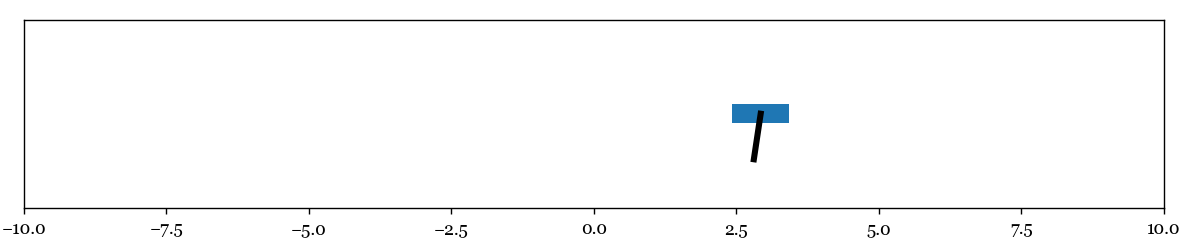

In [75]:
cart_pole = CartPole.CartPole( visual=True, save_frames=False, fig_num=58 )

state = np.array( [ 0, 0, 0, 0, 0 ] )
#p = np.array( [0.76187176,  1.19122763, 16.3309897 ,  2.49340076, 0] ) # optimised from theta=0.1
#p = np.array( [0.75971638,  1.44284499, 17.05744679,  2.66183469, 0] ) # optimised from theta=0.5
#p = np.array( [ -0.33143221, -0.42699904, -0.09783966,  0.10055861, 0 ] )
#p = np.array( [2.13646362,  2.594651,   17.62534208,  3.10145759, 0] ) # optimised on model
#p = np.array( [2.29932985, 3.80458197, 22.57529485, 3.9609772, 0] ) # better? optimised on model
#p = np.array( [ 2.42158373, 3.81812947, 22.41281719, 3.95562641, 0 ] ) # optimised on model with 8 second horizon
#p = np.array( [ 2.77273844, 4.15835948, 23.64017977, 4.15351885, 0] ) # optimised on model with larger initial displacement
#p = np.array( [11.91259675, 8.02276575, 29.81324002, 5.60813997, 0] ) # different initial state (bad)
#p = np.array( [1.10893787, 2.01832636, 16.99658894, 2.91580321, 0] ) # fit on noise
#p = np.array([ 0.088,-0.274,-31.37,-4.66,0 ])
#p = np.array([3.91092163, -3.24638638, 4.9457018, -4.80275196, 0])
p = np.array([-2.38362354, -4.94276337, -3.48514146, -3.39752314, 0])
#p = np.array([0.52867083, 1.34935861, 15.04318042, 2.4385310, 0])

cart_pole.set_state( state )

cart_pole._render()

In [76]:
for i in range(50):
    
    noise_level = 0.10

    clipped_state = state
    clipped_state[0] = np.clip( state[0], -2, 2 )
    clipped_state = clipped_state

    state[4] = p @ clipped_state
    state = CartPole.perform_action_RK4( state ) + np.random.randn( 5 ) * means * noise_level
    cart_pole.set_state( state[:4] )
    cart_pole._render()

<IPython.core.display.Javascript object>


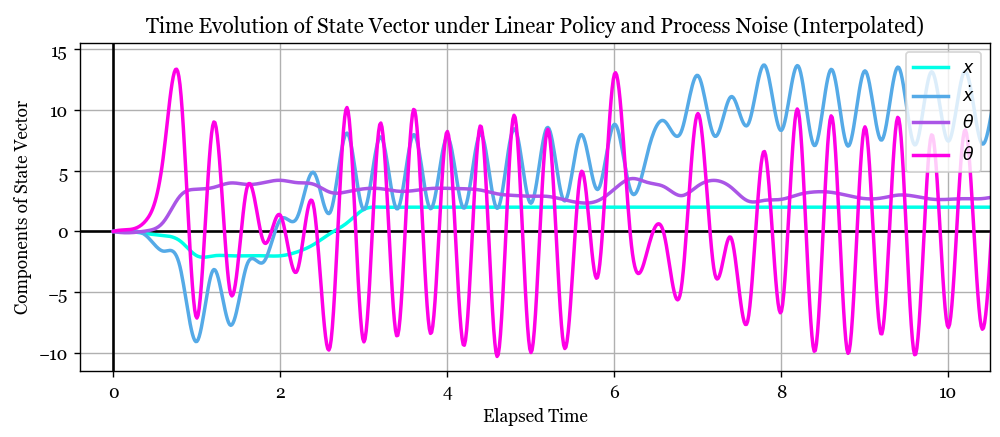

(-0.4, 10.5)

In [39]:
fig, ax = plt.subplots(1, 1, num=33, figsize=(8,3.5))
fig.subplots_adjust(top=0.9, bottom=0.15, left=0.08, right=0.99)
sf3utility.setup_phase_portrait( ax )

# small oscillations about stable equilibrium

state = np.array( [ 0, 0, 0, 0, 0 ] )

noise_level = 0.05

states = []
times = []

np.random.seed(4)

for i in range(55):
    
    states.append( state )
    times.append( i * 0.2 )
    
    clipped_state = state
    clipped_state[0] = np.clip( state[0], -2, 2 )
    clipped_state = clipped_state

    state[4] = p @ clipped_state
    state = CartPole.perform_action_RK4( state ) + np.random.randn( 5 ) * means * noise_level

states = np.array( states )
times = np.array( times )

x = times
y = states

col_lerp = np.linspace(0, 1, 4)[np.newaxis].T
colours = ( 1 - col_lerp ) * np.array( [0, 255, 231, 255] )/255 + col_lerp * np.array( [255, 0, 230, 255] )/255

labels = ["$x$","$\dot{x}$","$θ$","$\dot{θ}$"]

for i in range(4):
    
    f2 = scipy.interpolate.interp1d(x, y[:,i], kind='cubic')

    xnew = np.linspace(0, times[-1], 800)
    
    ax.plot( xnew, f2(xnew), color=colours[i], label=labels[i], linewidth=2 )

ax.set_title( "Time Evolution of State Vector under Linear Policy and Process Noise (Interpolated)" )
ax.set_xlabel( "Elapsed Time" )
ax.set_ylabel( "Components of State Vector" )
ax.legend(loc="upper right")

# ax.set_ylim( -5, 5 )
ax.set_xlim( -0.4, 10.5 )

Above is a typical state vector plotted over time under a large amount of process noise. The cart and pole position are both maintained at nonzero levels, and the large oscillations in pole and cart velocity are the reason why keeping the pole upright is a nonviable policy.

Note that the cart cannot be stationary at the origin with the pole down because then the force contribution from the pole angle would be nonzero while the contribution from the cart position would be zero, so the cart would move. This is why the policy keeps the cart a bit away form the origin but a different angle definition or introduction of a bias term (common in machine learning) would be able to remove this effect.

To break out of this local minimum I used typical techniques like using different initial conditions and parameters and trying to make the policy train over a larger portion of the state space. I also incorporated some of the other learned policies to weight the starting locations to try to focus in on portions of the state space that I think will give good results (applying a prior). For small amounts of process noise, I found a policy very similar to the one trained under observation noise, and that performed similarly.

In [60]:
def noisy_rollout_loss( initial_state, p ):
    
    state = initial_state
    sim_seconds = 8
    sim_steps = int( sim_seconds / 0.2 )
    loss = 0
    noise_level = 0.001
    
    for i in range( sim_steps ):
        
        if np.any( np.abs(state) > np.array([10,40,50,1e+3,1e+3]) ):
            return sim_steps
        
        
        state = state + np.random.randn( 5 ) * means * noise_level
        
        state[4] = p @ state
        loss += CartPole.loss( state[:4] )
        state = CartPole.perform_action_RK4( state )
    
    return loss

In [61]:
%%time

initial_state = np.array( [ 0.0, 0, 0.0, 0, 0 ] )
#initial_state = np.array( [1,0,0.5,0,0] )

pad0 = lambda p : np.pad( p, (0,1) )
rollout_loss_from_initial = lambda p : noisy_rollout_loss( initial_state, pad0(p) )

means = np.array([ 2.00903004, 1.9578942, 1.99085053, 4.74956371, 0. ])


min_loss = 999999
best_p = None

for i in range(1000):

    p0     = np.array( [0.75971638,  1.44284499, 17.05744679,  2.66183469] ) + np.random.rand( (4) ) - 0.5
    result = scipy.optimize.minimize( rollout_loss_from_initial, p0, method="Nelder-Mead" )
    
    end_loss = rollout_loss_from_initial( result["x"] )
    
    if end_loss < min_loss:
        best_p = result["x"]
        min_loss = end_loss
        
    print(best_p, min_loss)

p = best_p

[ 1.2628629   1.30384466 17.20800319  2.67020149] 0.062348435885239084
[ 0.71611832  1.04229238 17.44256411  2.45652804] 0.04522878419916343
[ 0.77512016  1.11731129 17.01751932  2.50524075] 0.0379574665651915
[ 0.77512016  1.11731129 17.01751932  2.50524075] 0.0379574665651915
[ 0.77512016  1.11731129 17.01751932  2.50524075] 0.0379574665651915
[ 0.77512016  1.11731129 17.01751932  2.50524075] 0.0379574665651915
[ 0.77512016  1.11731129 17.01751932  2.50524075] 0.0379574665651915
[ 0.77512016  1.11731129 17.01751932  2.50524075] 0.0379574665651915
[ 0.77512016  1.11731129 17.01751932  2.50524075] 0.0379574665651915
[ 0.65545849  1.25784213 17.02263466  2.46822723] 0.03363931556579902
[ 0.65545849  1.25784213 17.02263466  2.46822723] 0.03363931556579902
[ 0.65545849  1.25784213 17.02263466  2.46822723] 0.03363931556579902
[ 0.65545849  1.25784213 17.02263466  2.46822723] 0.03363931556579902
[ 0.65545849  1.25784213 17.02263466  2.46822723] 0.03363931556579902
[ 0.65545849  1.25784213 1

[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496
[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496
[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496
[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496
[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496
[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496
[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496
[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496
[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496
[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496
[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496
[ 0.52867083  1.34935861 15.04318042  2.43853109] 0.022611990862002496


KeyboardInterrupt: 